In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="7"

### Load data

In [2]:
# load data
import pandas as pd
from glob import glob
import pickle

path = r'./original_dataset/'

files = sorted(glob(path+'*.csv'))

files

['../original_dataset/dangjin_fcst_data.csv',
 '../original_dataset/dangjin_obs_data.csv',
 '../original_dataset/energy.csv',
 '../original_dataset/sample_submission.csv',
 '../original_dataset/site_info.csv',
 '../original_dataset/ulsan_fcst_data.csv',
 '../original_dataset/ulsan_obs_data.csv']

In [67]:
dangjin_fcst_data = pd.read_csv(files[0])
dangjin_obs_data = pd.read_csv(files[1])
ulsan_fcst_data = pd.read_csv(files[5])
ulsan_obs_data = pd.read_csv(files[6])

energy = pd.read_csv(files[2])

### Quick look at the data

In [4]:
dangjin_fcst_data

,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 11:00:00,4.0,0.0,60.0,7.3,309.0,2.0
1,2018-03-01 11:00:00,7.0,-2.0,60.0,7.1,314.0,1.0
2,2018-03-01 11:00:00,10.0,-2.0,60.0,6.7,323.0,1.0
3,2018-03-01 11:00:00,13.0,-2.0,55.0,6.7,336.0,1.0
4,2018-03-01 11:00:00,16.0,-4.0,55.0,5.5,339.0,1.0
...,...,...,...,...,...,...,...
162203,2021-03-01 08:00:00,52.0,7.0,40.0,3.2,187.0,1.0
162204,2021-03-01 08:00:00,55.0,8.0,40.0,4.5,217.0,1.0
162205,2021-03-01 08:00:00,58.0,5.0,55.0,2.2,210.0,1.0
162206,2021-03-01 08:00:00,61.0,1.0,80.0,1.9,164.0,1.0


In [5]:
dangjin_obs_data

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
0,129,서산,2018-03-01 00:00,3.1,3.6,340.0,96.0,NaN
1,129,서산,2018-03-01 01:00,2.8,0.7,140.0,97.0,NaN
2,129,서산,2018-03-01 02:00,2.6,3.2,320.0,95.0,NaN
3,129,서산,2018-03-01 03:00,2.0,1.9,230.0,97.0,NaN
4,129,서산,2018-03-01 04:00,2.2,2.1,180.0,97.0,NaN
...,...,...,...,...,...,...,...,...
25621,129,서산,2021-01-31 19:00,6.7,1.5,200.0,75.0,8.0
25622,129,서산,2021-01-31 20:00,6.2,0.8,200.0,77.0,8.0
25623,129,서산,2021-01-31 21:00,5.3,0.7,230.0,82.0,8.0
25624,129,서산,2021-01-31 22:00,5.8,1.0,200.0,77.0,8.0


In [6]:
ulsan_fcst_data

,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 11:00:00,4.0,8.0,20.0,14.0,298.0,2.0
1,2018-03-01 11:00:00,7.0,4.0,20.0,4.3,298.0,2.0
2,2018-03-01 11:00:00,10.0,3.0,30.0,1.9,309.0,2.0
3,2018-03-01 11:00:00,13.0,0.0,40.0,1.5,318.0,2.0
4,2018-03-01 11:00:00,16.0,-1.0,45.0,1.8,308.0,2.0
...,...,...,...,...,...,...,...
162203,2021-03-01 08:00:00,52.0,9.0,45.0,3.1,83.0,3.0
162204,2021-03-01 08:00:00,55.0,9.0,45.0,3.0,111.0,3.0
162205,2021-03-01 08:00:00,58.0,8.0,55.0,2.2,122.0,3.0
162206,2021-03-01 08:00:00,61.0,6.0,65.0,0.9,131.0,3.0


In [7]:
ulsan_obs_data

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
0,152,울산,2018-03-01 00:00,8.2,3.9,340.0,98.0,10.0
1,152,울산,2018-03-01 01:00,7.0,4.1,320.0,97.0,10.0
2,152,울산,2018-03-01 02:00,6.5,5.9,290.0,80.0,NaN
3,152,울산,2018-03-01 03:00,6.2,4.6,320.0,79.0,3.0
4,152,울산,2018-03-01 04:00,6.7,4.5,320.0,73.0,1.0
...,...,...,...,...,...,...,...,...
25627,152,울산,2021-01-31 19:00,8.8,2.5,200.0,50.0,5.0
25628,152,울산,2021-01-31 20:00,8.7,3.9,200.0,49.0,1.0
25629,152,울산,2021-01-31 21:00,8.4,2.4,230.0,51.0,7.0
25630,152,울산,2021-01-31 22:00,9.4,3.3,230.0,51.0,8.0


### Change column name
1. obs_data의 '지점'과 '지점명'은 drop
2. Column name을 fcst_data를 기준으로 맞춘다.

In [8]:
# drop & re-order
dangjin_obs_data = dangjin_obs_data.loc[:,['일시','기온(°C)','습도(%)','풍속(m/s)','풍향(16방위)','전운량(10분위)']]
ulsan_obs_data = ulsan_obs_data.loc[:,['일시','기온(°C)','습도(%)','풍속(m/s)','풍향(16방위)','전운량(10분위)']]

In [9]:
dangjin_fcst_data

,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 11:00:00,4.0,0.0,60.0,7.3,309.0,2.0
1,2018-03-01 11:00:00,7.0,-2.0,60.0,7.1,314.0,1.0
2,2018-03-01 11:00:00,10.0,-2.0,60.0,6.7,323.0,1.0
3,2018-03-01 11:00:00,13.0,-2.0,55.0,6.7,336.0,1.0
4,2018-03-01 11:00:00,16.0,-4.0,55.0,5.5,339.0,1.0
...,...,...,...,...,...,...,...
162203,2021-03-01 08:00:00,52.0,7.0,40.0,3.2,187.0,1.0
162204,2021-03-01 08:00:00,55.0,8.0,40.0,4.5,217.0,1.0
162205,2021-03-01 08:00:00,58.0,5.0,55.0,2.2,210.0,1.0
162206,2021-03-01 08:00:00,61.0,1.0,80.0,1.9,164.0,1.0


In [10]:
dangjin_fcst_data['Forecast time']

0         2018-03-01 11:00:00
1         2018-03-01 11:00:00
2         2018-03-01 11:00:00
3         2018-03-01 11:00:00
4         2018-03-01 11:00:00
                 ...         
162203    2021-03-01 08:00:00
162204    2021-03-01 08:00:00
162205    2021-03-01 08:00:00
162206    2021-03-01 08:00:00
162207    2021-03-01 08:00:00
Name: Forecast time, Length: 162208, dtype: object

In [12]:
dangjin_fcst_data['Forecast time'][]

'2018-03-01 11:00:00'

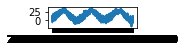

In [14]:
from matplotlib import pyplot as plt

plt.subplot(631)
plt.plot(dangjin_obs_data['일시'], dangjin_obs_data['기온(°C)'])

plt.tight_layout()

plt.show()

In [32]:
dangjin = pd.read_csv('../original_dataset/dangjin_obs_data.csv')
dangjin = dangjin.loc[:,['일시','기온(°C)','습도(%)','풍속(m/s)','풍향(16방위)','전운량(10분위)']]
dangjin.columns = ['Forecast time', 'Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud']
dangjin.index = dangjin['Forecast time']
dangjin = dangjin.drop('Forecast time', axis=1)
dangjin

,Temperature,Humidity,WindSpeed,WindDirection,Cloud
Forecast time,,,,,
2018-03-01 00:00,3.1,96.0,3.6,340.0,NaN
2018-03-01 01:00,2.8,97.0,0.7,140.0,NaN
2018-03-01 02:00,2.6,95.0,3.2,320.0,NaN
2018-03-01 03:00,2.0,97.0,1.9,230.0,NaN
2018-03-01 04:00,2.2,97.0,2.1,180.0,NaN
...,...,...,...,...,...
2021-01-31 19:00,6.7,75.0,1.5,200.0,8.0
2021-01-31 20:00,6.2,77.0,0.8,200.0,8.0
2021-01-31 21:00,5.3,82.0,0.7,230.0,8.0


In [46]:
dangjin.plot(kind='bar', subplots=True, figsize=(100, 100))
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

In [48]:
dangjin.isna().sum()

Temperature        37
Humidity           35
WindSpeed          36
WindDirection      36
Cloud            3970
dtype: int64

In [57]:
dangjin.iloc[:,-1][0] = 0

In [58]:
dangjin.fillna(method='ffill')

,Temperature,Humidity,WindSpeed,WindDirection,Cloud
Forecast time,,,,,
2018-03-01 00:00,3.1,96.0,3.6,340.0,0.0
2018-03-01 01:00,2.8,97.0,0.7,140.0,0.0
2018-03-01 02:00,2.6,95.0,3.2,320.0,0.0
2018-03-01 03:00,2.0,97.0,1.9,230.0,0.0
2018-03-01 04:00,2.2,97.0,2.1,180.0,0.0
...,...,...,...,...,...
2021-01-31 19:00,6.7,75.0,1.5,200.0,8.0
2021-01-31 20:00,6.2,77.0,0.8,200.0,8.0
2021-01-31 21:00,5.3,82.0,0.7,230.0,8.0


In [63]:
# dangjin['WindSpeed']
dangjin.iloc[:,2]

Forecast time
2018-03-01 00:00    3.6
2018-03-01 01:00    0.7
2018-03-01 02:00    3.2
2018-03-01 03:00    1.9
2018-03-01 04:00    2.1
                   ... 
2021-01-31 19:00    1.5
2021-01-31 20:00    0.8
2021-01-31 21:00    0.7
2021-01-31 22:00    1.0
2021-01-31 23:00    0.6
Name: WindSpeed, Length: 25626, dtype: float64

In [64]:
dangjin.iloc[:,2].max()

11.7

In [96]:
energy.iloc[0:24,:]

,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan
0,2018-03-01 1:00:00,0.0,0.0,0,0
1,2018-03-01 2:00:00,0.0,0.0,0,0
2,2018-03-01 3:00:00,0.0,0.0,0,0
3,2018-03-01 4:00:00,0.0,0.0,0,0
4,2018-03-01 5:00:00,0.0,0.0,0,0
5,2018-03-01 6:00:00,0.0,0.0,0,0
6,2018-03-01 7:00:00,0.0,0.0,0,0
7,2018-03-01 8:00:00,0.0,0.0,0,4
8,2018-03-01 9:00:00,36.0,33.0,37,35
9,2018-03-01 10:00:00,313.0,209.0,318,71


---

In [92]:
import datetime
dangjin_fcst_data['Forecast time'][0]

'2018-03-01 11:00:00'

In [102]:
dangjin_fcst_data[0:30]

,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 11:00:00,4.0,0.0,60.0,7.3,309.0,2.0
1,2018-03-01 11:00:00,7.0,-2.0,60.0,7.1,314.0,1.0
2,2018-03-01 11:00:00,10.0,-2.0,60.0,6.7,323.0,1.0
3,2018-03-01 11:00:00,13.0,-2.0,55.0,6.7,336.0,1.0
4,2018-03-01 11:00:00,16.0,-4.0,55.0,5.5,339.0,1.0
5,2018-03-01 11:00:00,19.0,-5.0,60.0,4.3,344.0,1.0
6,2018-03-01 11:00:00,22.0,-2.0,55.0,2.0,345.0,1.0
7,2018-03-01 11:00:00,25.0,1.0,45.0,0.8,256.0,1.0
8,2018-03-01 11:00:00,28.0,3.0,50.0,2.3,270.0,1.0
9,2018-03-01 11:00:00,31.0,1.0,55.0,1.9,264.0,1.0


In [105]:
dangjin = dangjin_fcst_data(datetime.datetime.strptime(dangjin_fcst_data['Forecast time'], '%Y-%m-%d %H:%M:%S'))

0         2018-03-01 11:00:00
1         2018-03-01 11:00:00
2         2018-03-01 11:00:00
3         2018-03-01 11:00:00
4         2018-03-01 11:00:00
                 ...         
162203    2021-03-01 08:00:00
162204    2021-03-01 08:00:00
162205    2021-03-01 08:00:00
162206    2021-03-01 08:00:00
162207    2021-03-01 08:00:00
Name: Forecast time, Length: 162208, dtype: object

In [113]:
pd.to_datetime(dangjin_fcst_data['Forecast time'], format='%Y-%m-%d %H:%M:%S')

0        2018-03-01 11:00:00
1        2018-03-01 11:00:00
2        2018-03-01 11:00:00
3        2018-03-01 11:00:00
4        2018-03-01 11:00:00
                 ...        
162203   2021-03-01 08:00:00
162204   2021-03-01 08:00:00
162205   2021-03-01 08:00:00
162206   2021-03-01 08:00:00
162207   2021-03-01 08:00:00
Name: Forecast time, Length: 162208, dtype: datetime64[ns]

현재의 Forecast time을 Forecast time + forecast로.

그러면, 새로운 Forecast time은 그 시간에 해당하고, 해당하는 그 시간의 날씨 정보가 컬럼

In [122]:
pd.to_datetime(dangjin_fcst_data.iloc[:,1], format='%H')

ValueError: unconverted data remains: 5

In [119]:
datetime.timedelta(hours=dangjin_fcst_data.iloc[:,1])

TypeError: unsupported type for timedelta hours component: Series

In [116]:
pd.to_datetime(dangjin_fcst_data['Forecast time'], format='%Y-%m-%d %H:%M:%S') + pd.to_datetime(dangjin_fcst_data['forecast']datetime.timedelta(hours=1) #datetime.timedelta(hours=dangjin_fcst_data['forecast'])

0        2018-03-01 12:00:00
1        2018-03-01 12:00:00
2        2018-03-01 12:00:00
3        2018-03-01 12:00:00
4        2018-03-01 12:00:00
                 ...        
162203   2021-03-01 09:00:00
162204   2021-03-01 09:00:00
162205   2021-03-01 09:00:00
162206   2021-03-01 09:00:00
162207   2021-03-01 09:00:00
Name: Forecast time, Length: 162208, dtype: datetime64[ns]

In [ ]:
now_fcst.iloc[:,0] = pd.to_datetime(dangjin_fcst_data['Forecast time'], format='%Y-%m-%d %H:%M:%S') + datetime.timedelta()

In [107]:
new_time = pd.DataFrame(dangjin_fcst_data(datetime.datetime.strptime(dangjin_fcst_data['Forecast time'], '%Y-%m-%d %H:%M:%S'), index=dangjin_fcst_data['Forecast time']))

TypeError: strptime() argument 1 must be str, not Series

In [108]:
new_time = pd.DataFrame(dangjin_fcst_data['Forecast time'])

In [112]:
new_time = datetime.datetime.strftime(new_time, '%Y-%m-%d %H:%M:%S')

TypeError: descriptor 'strftime' for 'datetime.date' objects doesn't apply to a 'DataFrame' object

In [103]:
now_f = datetime.datetime.strptime(dangjin_fcst_data['Forecast time'], '%Y-%m-%d %H:%M:%S') + datetime.timedelta(hours=dangjin_fcst_data['forecast'])

TypeError: strptime() argument 1 must be str, not Series

In [72]:
energy.max()

time                 2021-01-31 9:00:00
dangjin_floating                  753.0
dangjin_warehouse                 593.0
dangjin                             867
ulsan                               392
dtype: object

In [59]:
# dangjin['WindDirection']
dangjin.iloc[:,3]

Forecast time
2018-03-01 00:00    340.0
2018-03-01 01:00    140.0
2018-03-01 02:00    320.0
2018-03-01 03:00    230.0
2018-03-01 04:00    180.0
                    ...  
2021-01-31 19:00    200.0
2021-01-31 20:00    200.0
2021-01-31 21:00    230.0
2021-01-31 22:00    200.0
2021-01-31 23:00    230.0
Name: WindDirection, Length: 25626, dtype: float64

In [61]:
dangjin.iloc[:,3].max()

360.0

<function matplotlib.pyplot.show(close=None, block=None)>

/home/dongi/anaconda3/envs/dacon/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dongi/anaconda3/envs/dacon/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dongi/anaconda3/envs/dacon/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49845 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dongi/anaconda3/envs/dacon/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dongi/anaconda3/envs/dacon/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54413 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dongi/anaconda3/envs/dacon/li

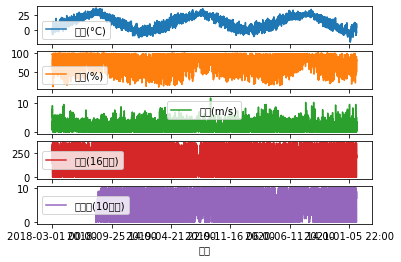

In [18]:
dangjin.plot(subplots=True)
plt.show

In [236]:
# change column names
new_column_names = list(dangjin_fcst_data.columns)
new_column_names.remove('forecast')
new_column_names

dangjin_obs_data.columns = new_column_names
ulsan_obs_data.columns = new_column_names
dangjin_obs_data

,Forecast time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 00:00,3.1,96.0,3.6,340.0,NaN
1,2018-03-01 01:00,2.8,97.0,0.7,140.0,NaN
2,2018-03-01 02:00,2.6,95.0,3.2,320.0,NaN
3,2018-03-01 03:00,2.0,97.0,1.9,230.0,NaN
4,2018-03-01 04:00,2.2,97.0,2.1,180.0,NaN
...,...,...,...,...,...,...
25621,2021-01-31 19:00,6.7,75.0,1.5,200.0,8.0
25622,2021-01-31 20:00,6.2,77.0,0.8,200.0,8.0
25623,2021-01-31 21:00,5.3,82.0,0.7,230.0,8.0
25624,2021-01-31 22:00,5.8,77.0,1.0,200.0,8.0


In [ ]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# load dataset
dataset = read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())

### Check datatype

In [237]:
dangjin_fcst_data.dtypes

Forecast time     object
forecast         float64
Temperature      float64
Humidity         float64
WindSpeed        float64
WindDirection    float64
Cloud            float64
dtype: object

In [238]:
dangjin_obs_data.dtypes

Forecast time     object
Temperature      float64
Humidity         float64
WindSpeed        float64
WindDirection    float64
Cloud            float64
dtype: object

### Missing values (결측값)

In [239]:
dangjin_fcst_data.isna().sum(axis=0)

Forecast time    0
forecast         0
Temperature      0
Humidity         0
WindSpeed        0
WindDirection    0
Cloud            0
dtype: int64

In [240]:
dangjin_obs_data.isna().sum(axis=0)

Forecast time       0
Temperature        37
Humidity           35
WindSpeed          36
WindDirection      36
Cloud            3970
dtype: int64

In [241]:
ulsan_fcst_data.isna().sum(axis=0)

Forecast time    0
forecast         0
Temperature      0
Humidity         0
WindSpeed        0
WindDirection    0
Cloud            0
dtype: int64

In [242]:
ulsan_obs_data.isna().sum(axis=0)

Forecast time      0
Temperature        4
Humidity           1
WindSpeed          1
WindDirection      1
Cloud            825
dtype: int64

### Calculate the timestamp being forecasted (in fcst_data)
: fcst_data에서 Forecast_time과 forecast를 더해 예측 대상이 되는 timestamp를 새로운 column으로  

1. Convert dtype to pd.datetime
2. Map a timestampe-adding function to the timestamp column

In [243]:
# convert dtype to pd.datetime 
dangjin_fcst_data['Forecast time'] = pd.to_datetime(dangjin_fcst_data['Forecast time'])
dangjin_obs_data['Forecast time'] = pd.to_datetime(dangjin_obs_data['Forecast time'])
ulsan_fcst_data['Forecast time'] = pd.to_datetime(ulsan_fcst_data['Forecast time'])
ulsan_obs_data['Forecast time'] = pd.to_datetime(ulsan_obs_data['Forecast time'])

Forecast time    datetime64[ns]
forecast                float64
Temperature             float64
Humidity                float64
WindSpeed               float64
WindDirection           float64
Cloud                   float64
dtype: object

In [244]:
# calculate
def to_date(x):
    return pd.DateOffset(hours=x)

dangjin_fcst_data['time'] = dangjin_fcst_data['Forecast time'] + dangjin_fcst_data['forecast'].map(to_date)
ulsan_fcst_data['time'] = ulsan_fcst_data['Forecast time'] + ulsan_fcst_data['forecast'].map(to_date)

C:\Users\IBK\Anaconda\lib\site-packages\pandas\core\arrays\datetimelike.py:1342: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  warnings.warn(


In [245]:
# drop the original columns
dangjin_fcst_data = dangjin_fcst_data.iloc[:,2:]
ulsan_fcst_data = ulsan_fcst_data.iloc[:,2:]

In [246]:
# re-order
dangjin_fcst_data = dangjin_fcst_data.iloc[:,[-1,0,1,2,3,4]]
ulsan_fcst_data = ulsan_fcst_data.iloc[:,[-1,0,1,2,3,4]]

In [247]:
dangjin_fcst_data

,time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 15:00:00,0.0,60.0,7.3,309.0,2.0
1,2018-03-01 18:00:00,-2.0,60.0,7.1,314.0,1.0
2,2018-03-01 21:00:00,-2.0,60.0,6.7,323.0,1.0
3,2018-03-02 00:00:00,-2.0,55.0,6.7,336.0,1.0
4,2018-03-02 03:00:00,-4.0,55.0,5.5,339.0,1.0
...,...,...,...,...,...,...
162203,2021-03-03 12:00:00,7.0,40.0,3.2,187.0,1.0
162204,2021-03-03 15:00:00,8.0,40.0,4.5,217.0,1.0
162205,2021-03-03 18:00:00,5.0,55.0,2.2,210.0,1.0
162206,2021-03-03 21:00:00,1.0,80.0,1.9,164.0,1.0


### Change column name of obs_data
: from 'Forecast time' to 'time'  
This is convineint becuase 'time' is the column name in 'energy.csv'.  

In [248]:
dangjin_obs_data = dangjin_obs_data.rename(columns={'Forecast time':'time'})
ulsan_obs_data = ulsan_obs_data.rename(columns={'Forecast time':'time'})

### Final overview & save in pickle

In [249]:
dangjin_fcst_data

,time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 15:00:00,0.0,60.0,7.3,309.0,2.0
1,2018-03-01 18:00:00,-2.0,60.0,7.1,314.0,1.0
2,2018-03-01 21:00:00,-2.0,60.0,6.7,323.0,1.0
3,2018-03-02 00:00:00,-2.0,55.0,6.7,336.0,1.0
4,2018-03-02 03:00:00,-4.0,55.0,5.5,339.0,1.0
...,...,...,...,...,...,...
162203,2021-03-03 12:00:00,7.0,40.0,3.2,187.0,1.0
162204,2021-03-03 15:00:00,8.0,40.0,4.5,217.0,1.0
162205,2021-03-03 18:00:00,5.0,55.0,2.2,210.0,1.0
162206,2021-03-03 21:00:00,1.0,80.0,1.9,164.0,1.0


In [250]:
dangjin_obs_data

,time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 00:00:00,3.1,96.0,3.6,340.0,NaN
1,2018-03-01 01:00:00,2.8,97.0,0.7,140.0,NaN
2,2018-03-01 02:00:00,2.6,95.0,3.2,320.0,NaN
3,2018-03-01 03:00:00,2.0,97.0,1.9,230.0,NaN
4,2018-03-01 04:00:00,2.2,97.0,2.1,180.0,NaN
...,...,...,...,...,...,...
25621,2021-01-31 19:00:00,6.7,75.0,1.5,200.0,8.0
25622,2021-01-31 20:00:00,6.2,77.0,0.8,200.0,8.0
25623,2021-01-31 21:00:00,5.3,82.0,0.7,230.0,8.0
25624,2021-01-31 22:00:00,5.8,77.0,1.0,200.0,8.0


In [251]:
ulsan_fcst_data

,time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 15:00:00,8.0,20.0,14.0,298.0,2.0
1,2018-03-01 18:00:00,4.0,20.0,4.3,298.0,2.0
2,2018-03-01 21:00:00,3.0,30.0,1.9,309.0,2.0
3,2018-03-02 00:00:00,0.0,40.0,1.5,318.0,2.0
4,2018-03-02 03:00:00,-1.0,45.0,1.8,308.0,2.0
...,...,...,...,...,...,...
162203,2021-03-03 12:00:00,9.0,45.0,3.1,83.0,3.0
162204,2021-03-03 15:00:00,9.0,45.0,3.0,111.0,3.0
162205,2021-03-03 18:00:00,8.0,55.0,2.2,122.0,3.0
162206,2021-03-03 21:00:00,6.0,65.0,0.9,131.0,3.0


In [252]:
ulsan_obs_data

,time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 00:00:00,8.2,98.0,3.9,340.0,10.0
1,2018-03-01 01:00:00,7.0,97.0,4.1,320.0,10.0
2,2018-03-01 02:00:00,6.5,80.0,5.9,290.0,NaN
3,2018-03-01 03:00:00,6.2,79.0,4.6,320.0,3.0
4,2018-03-01 04:00:00,6.7,73.0,4.5,320.0,1.0
...,...,...,...,...,...,...
25627,2021-01-31 19:00:00,8.8,50.0,2.5,200.0,5.0
25628,2021-01-31 20:00:00,8.7,49.0,3.9,200.0,1.0
25629,2021-01-31 21:00:00,8.4,51.0,2.4,230.0,7.0
25630,2021-01-31 22:00:00,9.4,51.0,3.3,230.0,8.0


In [253]:
# pickle the data
with open('dangjin_fcst_data.pkl','wb') as f:
    pickle.dump(dangjin_fcst_data,f)
with open('dangjin_obs_data.pkl','wb') as f:
    pickle.dump(dangjin_obs_data,f)
with open('ulsan_fcst_data.pkl','wb') as f:
    pickle.dump(ulsan_fcst_data,f)
with open('ulsan_obs_data.pkl','wb') as f:
    pickle.dump(ulsan_obs_data,f)

In [254]:
# how to load pickle (for future works)
with open('dangjin_fcst_data.pkl','rb') as f:
    loaded_dangjin_fcst_data = pickle.load(f)
loaded_dangjin_fcst_data

,time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 15:00:00,0.0,60.0,7.3,309.0,2.0
1,2018-03-01 18:00:00,-2.0,60.0,7.1,314.0,1.0
2,2018-03-01 21:00:00,-2.0,60.0,6.7,323.0,1.0
3,2018-03-02 00:00:00,-2.0,55.0,6.7,336.0,1.0
4,2018-03-02 03:00:00,-4.0,55.0,5.5,339.0,1.0
...,...,...,...,...,...,...
162203,2021-03-03 12:00:00,7.0,40.0,3.2,187.0,1.0
162204,2021-03-03 15:00:00,8.0,40.0,4.5,217.0,1.0
162205,2021-03-03 18:00:00,5.0,55.0,2.2,210.0,1.0
162206,2021-03-03 21:00:00,1.0,80.0,1.9,164.0,1.0
